# Tarea 9

### Sofía González Cataldo, rut 20.921.915-8

Use el método compuesto de Simpson y el método compuesto del trapecio para encontrar la siguiente integral

$$
\int_0^4 \frac{dx}{\sqrt{x^2 + 16}}
$$

Compare con el resultado exacto para obtener el error cometido. Grafique el error en función de $h$ para ambos métodos y compare con las fórmulas de error.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [103]:
def f(x):
    '''
    Función requerida para el problema.
    '''
    return 1/np.sqrt(x**2 + 16)

$$
\int_a^b dx\,f(x) = \frac{h}{2}\left[f(a) + 2\sum_{i=1}^{n-1} f(x_i) + f(b)\right]- \frac{h^2 (b-a)}{12}f''(\mu)
$$

In [104]:
# Fórmula compuesta del trapecio
def trapecio(f, a, b, n):
    '''
    Función que aproxima la integral con la fórmula compuesta del trapecio.
    '''
    h = (b - a)/n
    xi = [a + i*h for i in range(1, n)] # x_i
    fx = [f(x) for x in xi] # f(x_i)
    return (h/2)*(f(a) + 2*sum(fx) + f(b)), h

In [105]:
int_trapecio, ht = trapecio(f, 0, 4, 6)
int_trapecio

0.8805548962351778

$$
\int_a^b dx\,f(x) = \frac{h}{3}\left[f(a) + 2\sum_{i=1}^{n/2-1} f(x_{2i}) + 4\sum_{i=1}^{n/2} f(x_{2i-1}) + f(b)\right]- \frac{h^4 (b-a)}{180}f''(\mu)
$$

In [106]:
# Fórmula compuesta de Simpson
def simpson(f, a, b, n):
    '''
    Función que aproxima la integral con la fórmula compuesta de simpson.
    '''
    h = (b - a)/n
    xi = [a + 2*i*h for i in range(1, int((n/2) - 1) + 1)] # x_2i 
    xj = [a + (2*i - 1)*h for i in range(1, int((n/2) + 1))] # x_(2i-1)
    fxi = [f(x) for x in xi] # términos f(x_2i)
    fxj = [f(x) for x in xj] # términos f(x_(2i-1))
    return (h/3)*(f(a) + 2*sum(fxi) + 4*sum(fxj) + f(b)), h

In [107]:
int_simpson, hs = simpson(f, 0, 4, 6)
int_simpson

0.8813746413156114

In [108]:
# Valor exacto de la integral
exacta, error = integrate.quad(f, 0, 4)
exacta

0.8813735870195429

El valor exacto de la integral es 0.8813735870195429, mientras que el resultado obtenido por la fórmula del Trapecio fue 0.8805548962351778 y por la regla de Simpson fue 0.8813746413156114.

### Errores de cada método

Ahora queremos estudiar los errores de cada método, y analizar si coincide con las fórmulas que son presentadas en las aproximaciones.

In [109]:
# Modificamos h, y a la vez se modificará el valor de la integral
# Generamos un array con ambos valores, para el método del trapecio y simpson
trapecios = np.array([trapecio(f, 0, 4, N) for N in range(2, 40, 2)])
simpsons = np.array([simpson(f, 0, 4, N) for N in range(2, 40, 2 )])

In [110]:
# Se calcula el error para cada valor de h
err_trap = np.array([abs(exacta - trapecios[i][0]) for i in range(19)])
err_simp = np.array([abs(exacta - simpsons[i][0]) for i in range(19)])

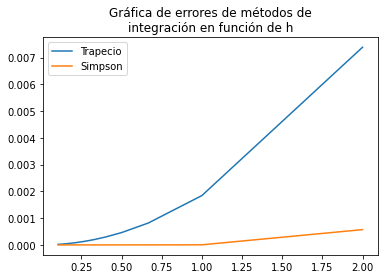

In [111]:
plt.plot(trapecios[:, 1], err_trap, label='Trapecio')
plt.plot(simpsons[:,1], err_simp, label='Simpson')
plt.title('Gráfica de errores de métodos de\nintegración en función de h')
plt.legend()

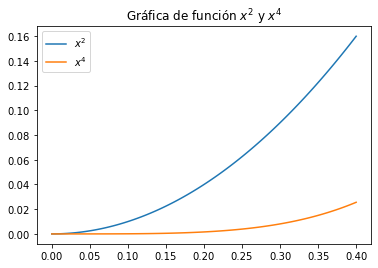

In [112]:
x = np.linspace(0, 0.4, 100)
plt.plot(x, x**2, label='$x^2$')
plt.plot(x, x**4, label='$x^4$')
plt.title('Gráfica de función $x^2$ y $x^4$')
plt.legend()

Sabemos que el error del método del trapecio se comporta como: 

$$
\frac{h^2 (b-a)}{12}f''(\mu)
$$

Mientras que el error del método de Simpson se comporta como:

$$
\frac{h^4 (b-a)}{180}f''(\mu)
$$


De la gráfica de los errores en función de h, se observa la tendencia presentada en las fórmulas. El método del trapecio tiene un error con un crecimiento más rápido ($h^2$) mientras que el método de Simpson, tiene un error menor para el mismo h ($h^4$). Comparando con la gráfica de una función $x^2$ y $x^4$, Se observa la misma tendencia de crecimiento, obviamente con un rango de error a las gráficas originales. Por lo tanto se confirman los comportamientos de error presentados en las fórmulas.